### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
# import plotly and offline mode
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go

# import cufflinks and offline mode
import cufflinks as cf
cf.go_offline()
# For Notebooks
init_notebook_mode(connected=True)
% matplotlib inline

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [2]:
mpg_data = pd.read_csv('mpg.csv',index_col='name')

In [3]:
## Let's have a look at data

In [4]:
print(mpg_data.head())
print(mpg_data.index)
print(mpg_data.columns)

                            mpg  cylinders  displacement horsepower  weight  \
name                                                                          
chevrolet chevelle malibu  18.0          8         307.0        130    3504   
buick skylark 320          15.0          8         350.0        165    3693   
plymouth satellite         18.0          8         318.0        150    3436   
amc rebel sst              16.0          8         304.0        150    3433   
ford torino                17.0          8         302.0        140    3449   

                           acceleration  model_year  origin  
name                                                         
chevrolet chevelle malibu          12.0          70       1  
buick skylark 320                  11.5          70       1  
plymouth satellite                 11.0          70       1  
amc rebel sst                      12.0          70       1  
ford torino                        10.5          70       1  
Index(['chev

In [5]:
mpg_data.shape

(398, 8)

### Data Cleaning

In [6]:
mpg_data.isnull().any()

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
model_year      False
origin          False
dtype: bool

In [7]:
## Nothing seems to be missing

In [8]:
mpg_data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model_year        int64
origin            int64
dtype: object

But then, why is horsepower an object and not a float, the values above were clearly numbers We should convert the column using astype()

Checking the unique elements of horsepower to look for discrepancies 

In [9]:
mpg_data.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148', '129',
       '96', '71', '98', '115', '53', '81', '79', '120', '152', '102',
       '108', '68', '58', '149', '89', '63', '48', '66', '139', '103',
       '125', '133', '138', '135', '142', '77', '62', '132', '84', '64',
       '74', '116', '82'], dtype=object)

In [10]:
mpg_data = mpg_data[mpg_data.horsepower != '?']

In [11]:
print('?' in mpg_data.horsepower)

False


In [12]:
mpg_data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model_year        int64
origin            int64
dtype: object

So we see all entries with '?' as place holder for data are removed. However, we the horsepower data is still an object type and not float. That is because pandas coerced the entire column as object when we imported the data set due to '?', so lets change that data

In [13]:
mpg_data.horsepower = mpg_data.horsepower.astype('float')
mpg_data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model_year        int64
origin            int64
dtype: object

In [14]:
mpg_data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


### Step 1: Let's look at mpg

In [15]:
mpg_data.mpg.describe()

count    392.000000
mean      23.445918
std        7.805007
min        9.000000
25%       17.000000
50%       22.750000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

The minimum value is 9 and maximum is 46, but on average it is 23.44 with a variation of 7.8

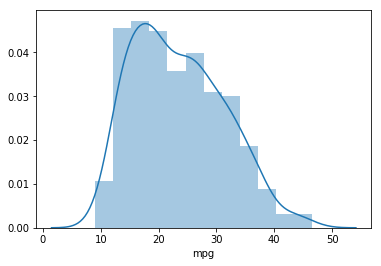

In [16]:
sns.distplot(mpg_data['mpg'])

In [17]:
print("Skewness: %f" % mpg_data['mpg'].skew())
print("Kurtosis: %f" % mpg_data['mpg'].kurt())

Skewness: 0.457092
Kurtosis: -0.515993


Lets visualise some relationships between these data points, but before we do, we need to scale them to same the same range of [0,1]

In [18]:
def scale(a):
    b = (a-a.min())/(a.max()-a.min())
    return b


In [19]:
data_scale = mpg_data.copy()

In [20]:
data_scale ['displacement'] = scale(data_scale['displacement'])
data_scale['horsepower'] = scale(data_scale['horsepower'])
data_scale ['acceleration'] = scale(data_scale['acceleration'])
data_scale ['weight'] = scale(data_scale['weight'])
data_scale['mpg'] = scale(data_scale['mpg'])

In [21]:
data_scale.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
name,,,,,,,,
chevrolet chevelle malibu,0.239362,8,0.617571,0.456522,0.536150,0.238095,70,1
buick skylark 320,0.159574,8,0.728682,0.646739,0.589736,0.208333,70,1
plymouth satellite,0.239362,8,0.645995,0.565217,0.516870,0.178571,70,1
amc rebel sst,0.186170,8,0.609819,0.565217,0.516019,0.238095,70,1
ford torino,0.212766,8,0.604651,0.510870,0.520556,0.148810,70,1


All our data is now scaled to the same range of [0,1]. This will help us visualize data better. We used a copy of the original data-set for this as we will use the data-set later when we build regression models.

In [22]:
data_scale[(data_scale['origin']==2)].head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
name,,,,,,,,
volkswagen 1131 deluxe sedan,0.452128,4,0.074935,0.000000,0.062943,0.744048,70,2
peugeot 504,0.425532,4,0.108527,0.222826,0.300255,0.565476,70,2
audi 100 ls,0.398936,4,0.100775,0.239130,0.231642,0.386905,70,2
saab 99e,0.425532,4,0.093023,0.266304,0.216048,0.565476,70,2
bmw 2002,0.452128,4,0.136951,0.364130,0.176070,0.267857,70,2


In [23]:
data_scale[(data_scale['origin']==3)].head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
name,,,,,,,,
toyota corona mark ii,0.398936,4,0.116279,0.266304,0.215197,0.416667,70,3
datsun pl510,0.478723,4,0.074935,0.228261,0.146583,0.386905,70,3
datsun pl510,0.478723,4,0.074935,0.228261,0.146583,0.386905,71,3
toyota corona,0.425532,4,0.116279,0.266304,0.174369,0.357143,71,3
toyota corolla 1200,0.585106,4,0.007752,0.103261,0.045364,0.654762,71,3


Now we can see that cars with origin 1 are from USA, 2 from Europe and 3 from Japan

In [24]:
mpg_data['Country_code'] = mpg_data.origin.replace([1,2,3],['USA','Europe','Japan'])
data_scale['Country_code'] = mpg_data.origin.replace([1,2,3],['USA','Europe','Japan'])

In [25]:
data_scale.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,Country_code
name,,,,,,,,,
chevrolet chevelle malibu,0.239362,8,0.617571,0.456522,0.536150,0.238095,70,1,USA
buick skylark 320,0.159574,8,0.728682,0.646739,0.589736,0.208333,70,1,USA
plymouth satellite,0.239362,8,0.645995,0.565217,0.516870,0.178571,70,1,USA
amc rebel sst,0.186170,8,0.609819,0.565217,0.516019,0.238095,70,1,USA
ford torino,0.212766,8,0.604651,0.510870,0.520556,0.148810,70,1,USA


The red line marks the average of the set. From the above plot we can observe:

Majority of the cars from USA (almost 75%) have MPG below global average.

Majority of the cars from Japan and Europe have MPG above global average.

### Data Visualization

So far, we have seen the data to get a feel for it, we saw the spread of the desired variable MPG along the various discrete variables, namely, Origin, Year of Manufacturing or Model and Cylinders.
Now lets extract an additional discrete variable company name and add it to this data. We will use regular expressions and str.extract() function of pandas data-frame to make this new column

In [26]:
mpg_data.index

Index(['chevrolet chevelle malibu', 'buick skylark 320', 'plymouth satellite',
       'amc rebel sst', 'ford torino', 'ford galaxie 500', 'chevrolet impala',
       'plymouth fury iii', 'pontiac catalina', 'amc ambassador dpl',
       ...
       'chrysler lebaron medallion', 'ford granada l', 'toyota celica gt',
       'dodge charger 2.2', 'chevrolet camaro', 'ford mustang gl', 'vw pickup',
       'dodge rampage', 'ford ranger', 'chevy s-10'],
      dtype='object', name='name', length=392)

As we can see the index of the data frame contains model name along with the company name. Now lets use regular expressions to quickly extract the company names. As we can see the index is in format 'COMPANY_NAME - SPACE -MODEL - SPACE -VARIANT' and so regular expressions will make it an easy task.

In [27]:
mpg_data[mpg_data.index.str.contains('subaru')].index.str.replace('(.*)', 'subaru dl')

Index(['subaru dl', 'subaru dl', 'subaru dl', 'subaru dl'], dtype='object', name='name')

In [28]:
mpg_data['Company_Name'] = mpg_data.index.str.extract('(^.*?)\s')

In [29]:
mpg_data['Company_Name'] =mpg_data['Company_Name'].replace(['volkswagen','vokswagen','vw'],'VW')
mpg_data['Company_Name'] = mpg_data['Company_Name'].replace('maxda','mazda')
mpg_data['Company_Name'] = mpg_data['Company_Name'].replace('toyouta','toyota')
mpg_data['Company_Name'] = mpg_data['Company_Name'].replace('mercedes','mercedes-benz')
mpg_data['Company_Name'] = mpg_data['Company_Name'].replace('nissan','datsun')
mpg_data['Company_Name'] = mpg_data['Company_Name'].replace('capri','ford')
mpg_data['Company_Name'] = mpg_data['Company_Name'].replace(['chevroelt','chevy'],'chevrolet')
mpg_data['Company_Name'].fillna(value = 'subaru',inplace=True)  ## Strin methords will not work on null values so we use fillna()

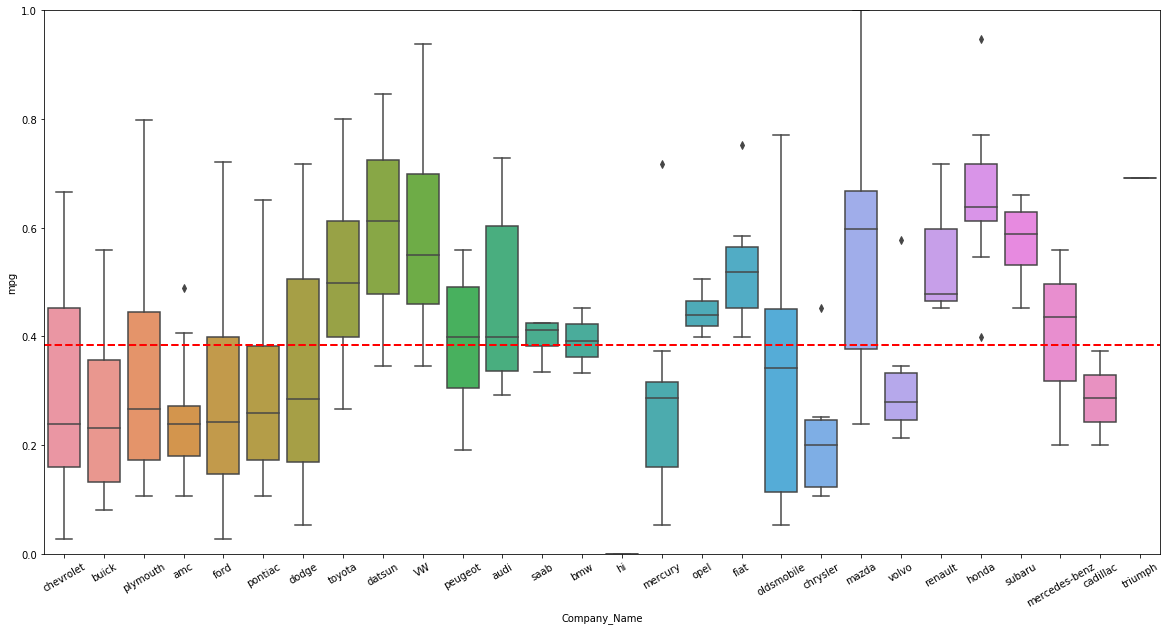

In [30]:
var = 'Company_Name'
data_plt = pd.concat([data_scale['mpg'], mpg_data[var]], axis=1)
f, ax = plt.subplots(figsize=(20,10))
fig = sns.boxplot(x=var, y="mpg", data=data_plt)
fig.set_xticklabels(ax.get_xticklabels(),rotation=30)
fig.axis(ymin=0, ymax=1)
plt.axhline(data_scale.mpg.mean(),color='r',linestyle='dashed',linewidth=2)

In [31]:
mpg_data.Company_Name.isnull().any()

False

In [32]:
mpg_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,Country_code,Company_Name
name,,,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,1,USA,chevrolet
buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,1,USA,buick
plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,1,USA,plymouth
amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,1,USA,amc
ford torino,17.0,8,302.0,140.0,3449,10.5,70,1,USA,ford


In [33]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

#### Plotting MPG against cylinders

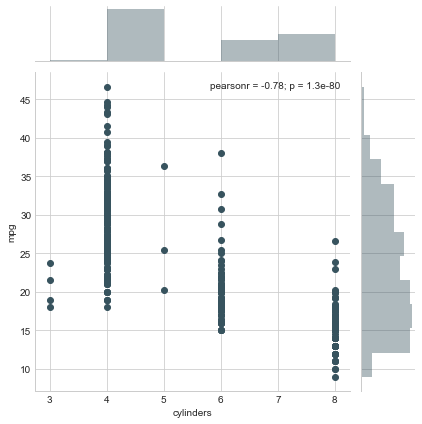

In [34]:
sns.jointplot(x='cylinders',y='mpg',data=mpg_data)

 Mpg decreases with increase in number of cylinders

#### MPG VS Displacement

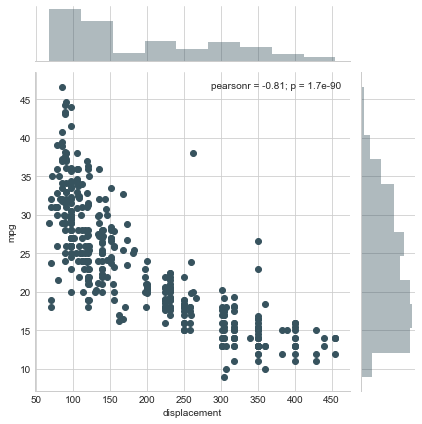

In [35]:
sns.jointplot(x='displacement',y='mpg',data=mpg_data)

Mpg decreases with increase in displacement

#### MPG VS Horsepower

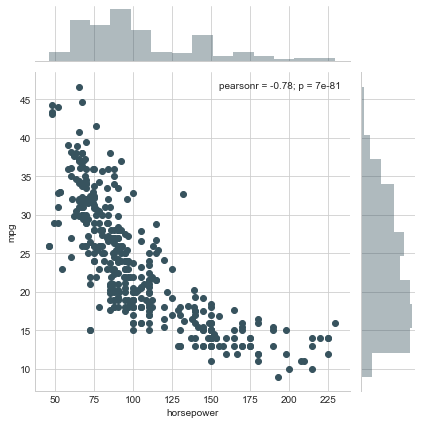

In [36]:
sns.jointplot(x='horsepower',y='mpg',data=mpg_data)

Mpg decreases with increase in horsepower

#### MPG VS weight

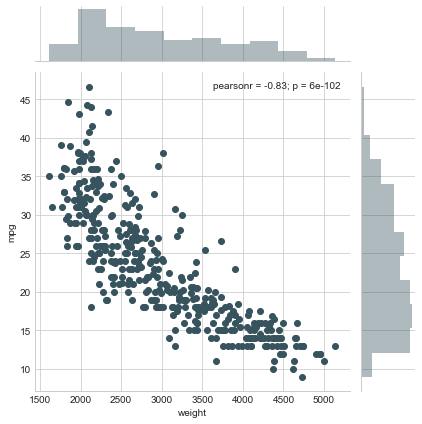

In [37]:
sns.jointplot(x='weight',y='mpg',data=mpg_data)

Mpg decreases with increase in weight

#### MPG VS Acceleration

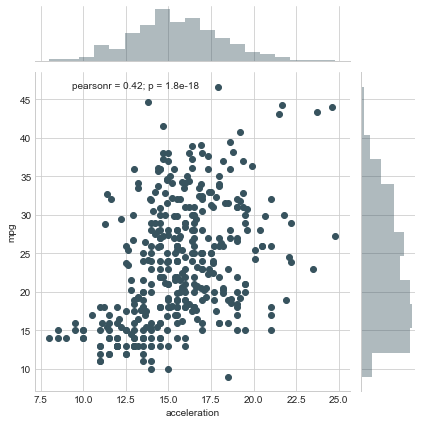

In [38]:
sns.jointplot(x='acceleration',y='mpg',data=mpg_data)

Mpg increases with increase in acceleration

#### MPG vs Model_Year

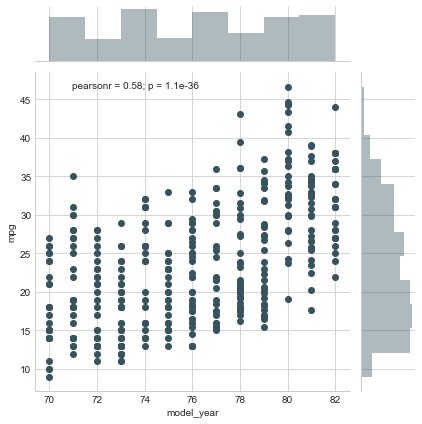

In [39]:
sns.jointplot(x='model_year',y='mpg',data=mpg_data)

#### MPG vs Origin

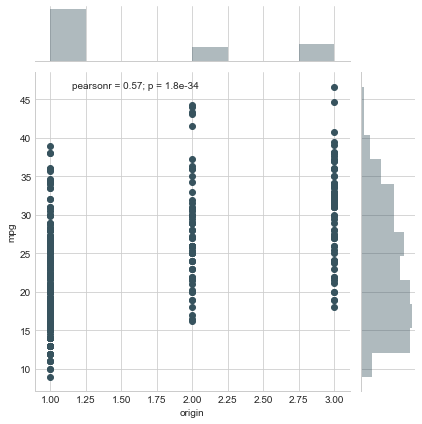

In [40]:
sns.jointplot(x='origin',y='mpg',data=mpg_data)

#### Distribution plots

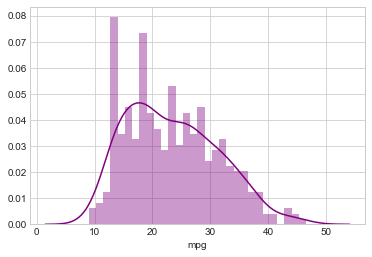

In [41]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(mpg_data['mpg'],bins=30,color='purple')

We can see that mpg is right skewed

#### Distribution of independent variables

Displacement

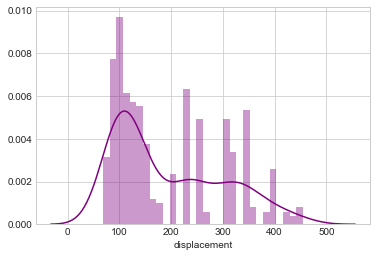

In [42]:
sns.distplot(mpg_data['displacement'],bins=30,color='purple')

Horsepower

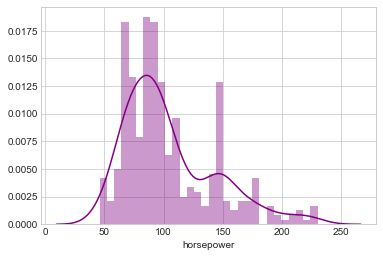

In [43]:
sns.distplot(mpg_data['horsepower'],bins=30,color='purple')

Weight

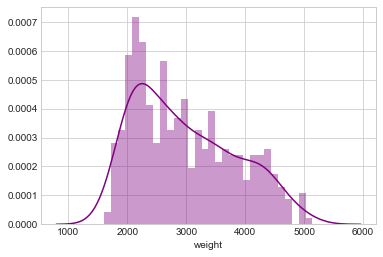

In [44]:
sns.distplot(mpg_data['weight'],bins=30,color='purple')

Acceleration

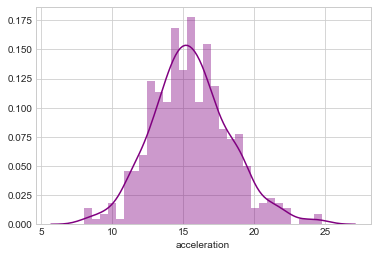

In [45]:
sns.distplot(mpg_data['acceleration'],bins=30,color='purple')

Distribution Brand wise

In [46]:
data = []

data.append(go.Bar(
    x = mpg_data['Company_Name'].value_counts().index.values.astype('str'), # Need to use .astype('str') to transform categorical data
    y = mpg_data['Company_Name'].value_counts().values,
    marker = dict(
        
        )
    ))

iplot(data)

We can see that few brands have very few data to actually gain any insight from it 

Distribution based on number of cylinder

In [47]:
data = []

data.append(go.Bar(
    x = mpg_data['cylinders'].value_counts().index.values.astype('str'), # Need to use .astype('str') to transform categorical data
    y = mpg_data['cylinders'].value_counts().values,
    marker = dict(
        
        )
    ))

iplot(data)

The mpg variable seems somewhat close to being normal, could have done some sort of transformation to get it closer to being normal

Displacement values are greatly skewed towards the smaller values and again could have done some sort of transformation to make them look better, not sure what transformation though

Similar to the displacement graph distribution is that of the horsepower values. As expected there were no 1000 horsepower cars back then

Weight values look like the previous two variables of interest but there is a bit more population as you move towards the bigger values

Acceleration values look as close to a bell curve as you are going to get. I wonder what the units were for these values for acceleration

Ford has the most vehicles in the data followed by Chevy. Seems like there is plenty of representation for the common brands in the data set and little of the luxury brands like BMW, Cadillac and Mercedes Most cars were 4 cylinder cars which is no surprise considering the era the data came from

### Box plots of MPG VS Cyclinders , MPG VS Model_Year, MPG VS Company, MPG VS Origin

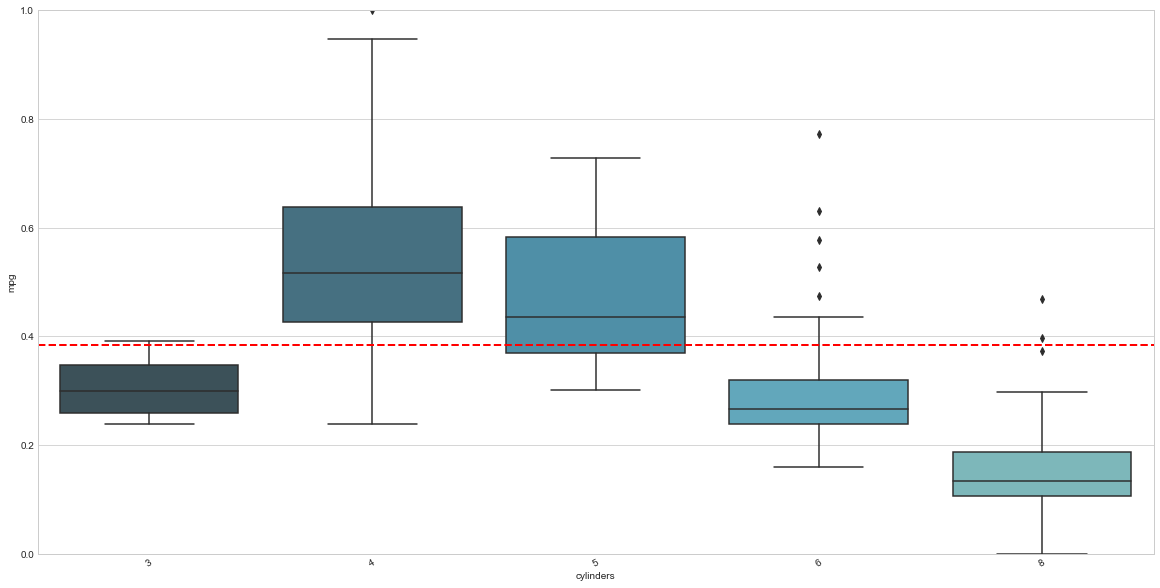

In [48]:
var = 'cylinders'
data_plt = pd.concat([data_scale['mpg'], mpg_data[var]], axis=1)
f, ax = plt.subplots(figsize=(20,10))
fig = sns.boxplot(x=var, y="mpg", data=data_plt)
fig.set_xticklabels(ax.get_xticklabels(),rotation=30)
fig.axis(ymin=0, ymax=1)
plt.axhline(data_scale.mpg.mean(),color='r',linestyle='dashed',linewidth=2)

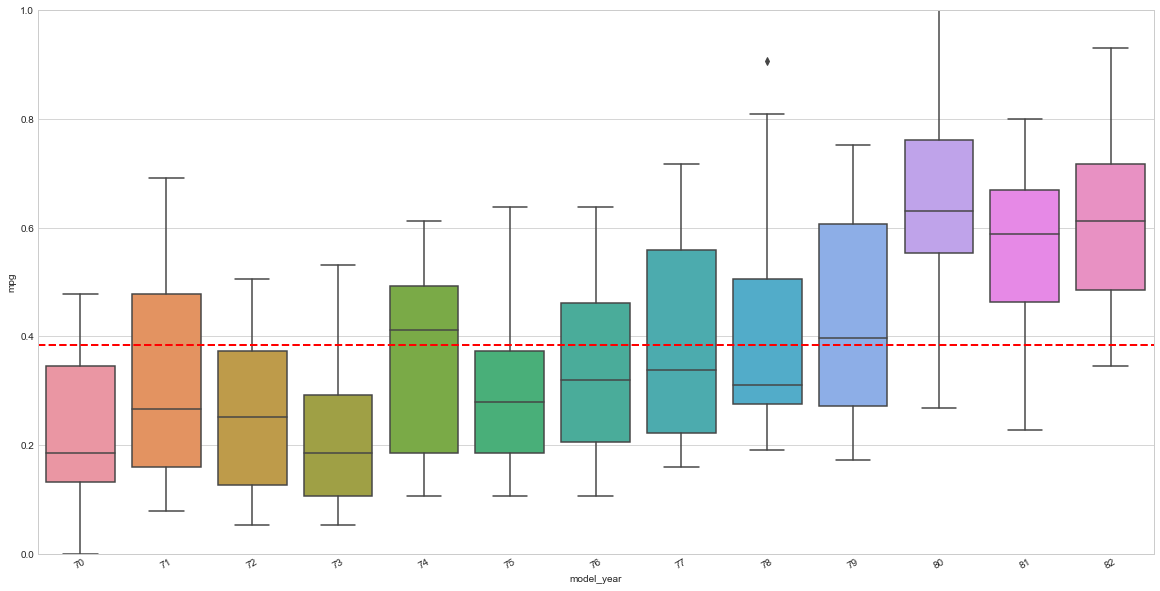

In [49]:
var = 'model_year'
data_plt = pd.concat([data_scale['mpg'], mpg_data[var]], axis=1)
f, ax = plt.subplots(figsize=(20,10))
fig = sns.boxplot(x=var, y="mpg", data=data_plt)
fig.set_xticklabels(ax.get_xticklabels(),rotation=30)
fig.axis(ymin=0, ymax=1)
plt.axhline(data_scale.mpg.mean(),color='r',linestyle='dashed',linewidth=2)

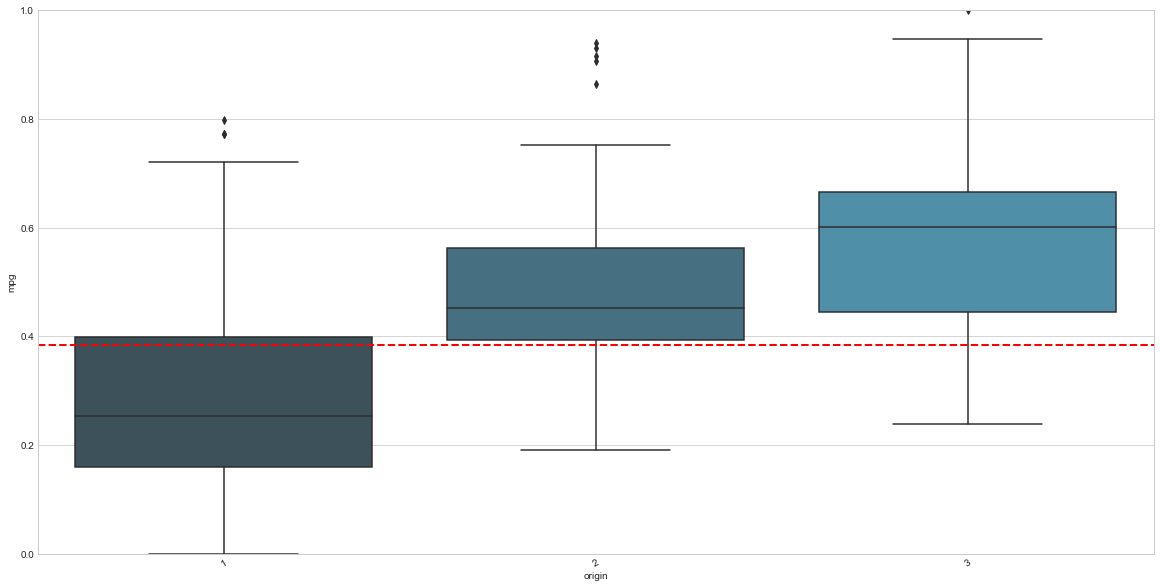

In [50]:
var = 'origin'
data_plt = pd.concat([data_scale['mpg'], mpg_data[var]], axis=1)
f, ax = plt.subplots(figsize=(20,10))
fig = sns.boxplot(x=var, y="mpg", data=data_plt)
fig.set_xticklabels(ax.get_xticklabels(),rotation=30)
fig.axis(ymin=0, ymax=1)
plt.axhline(data_scale.mpg.mean(),color='r',linestyle='dashed',linewidth=2)

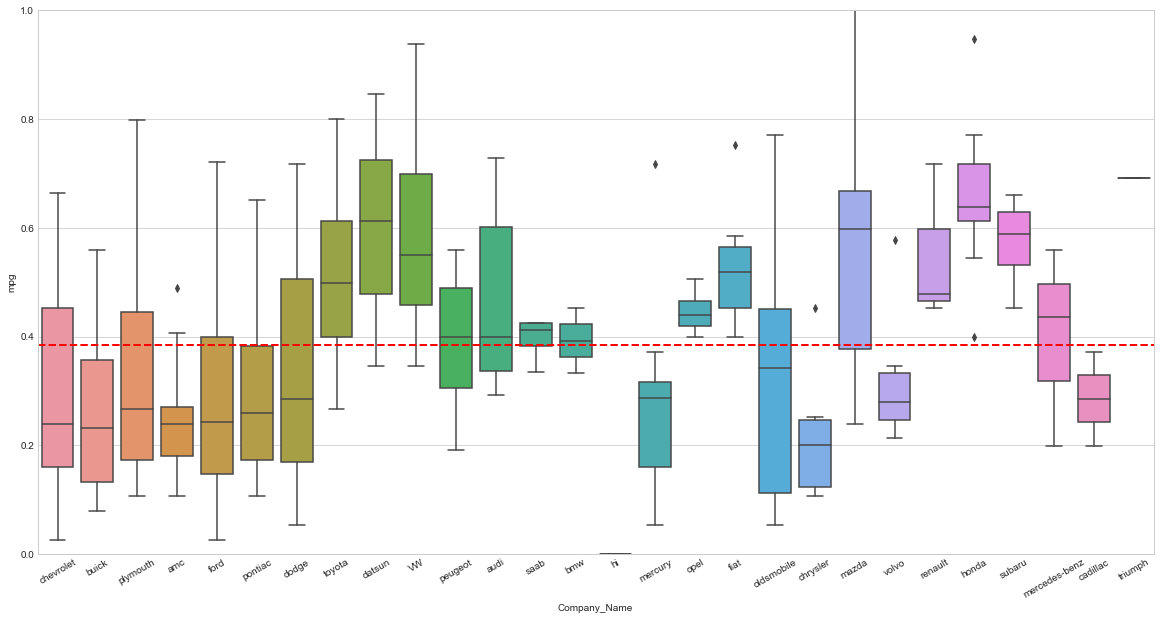

In [51]:
var = 'Company_Name'
data_plt = pd.concat([data_scale['mpg'], mpg_data[var]], axis=1)
f, ax = plt.subplots(figsize=(20,10))
fig = sns.boxplot(x=var, y="mpg", data=data_plt)
fig.set_xticklabels(ax.get_xticklabels(),rotation=30)
fig.axis(ymin=0, ymax=1)
plt.axhline(data_scale.mpg.mean(),color='r',linestyle='dashed',linewidth=2)

#### Interpretations :

The general trend for the mpg as the number of cylinders increased was down. The more cylinders you had the worse off your mpg was. The best number of cylinders to have seems like 4, 4 cylinders had the best mpg

It seems as if as the years progressed the general mpg values increased too. I am guessing with improved engineering the mpg would have been expected to improve with time.

The places of origin are but it seems like cars that came from region 3(Japan) had the best mpg with region 1(USA) having the worst of the three regions

### Correlation between the variables

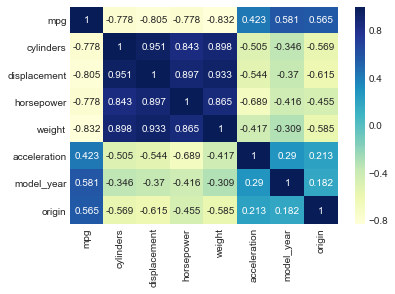

In [52]:
sns.heatmap(mpg_data.corr(),annot=True,fmt=".3g",cmap='YlGnBu')

The highest correlation between mpg and any of the other variables is with weight and it is a negative correlation. This makes sense, the more a car weighs the more energy required to move it down the road and the energy is from the gasoline which means your mpg is going to suffer

There is not much of a correlation between the mpg and the brand of the car

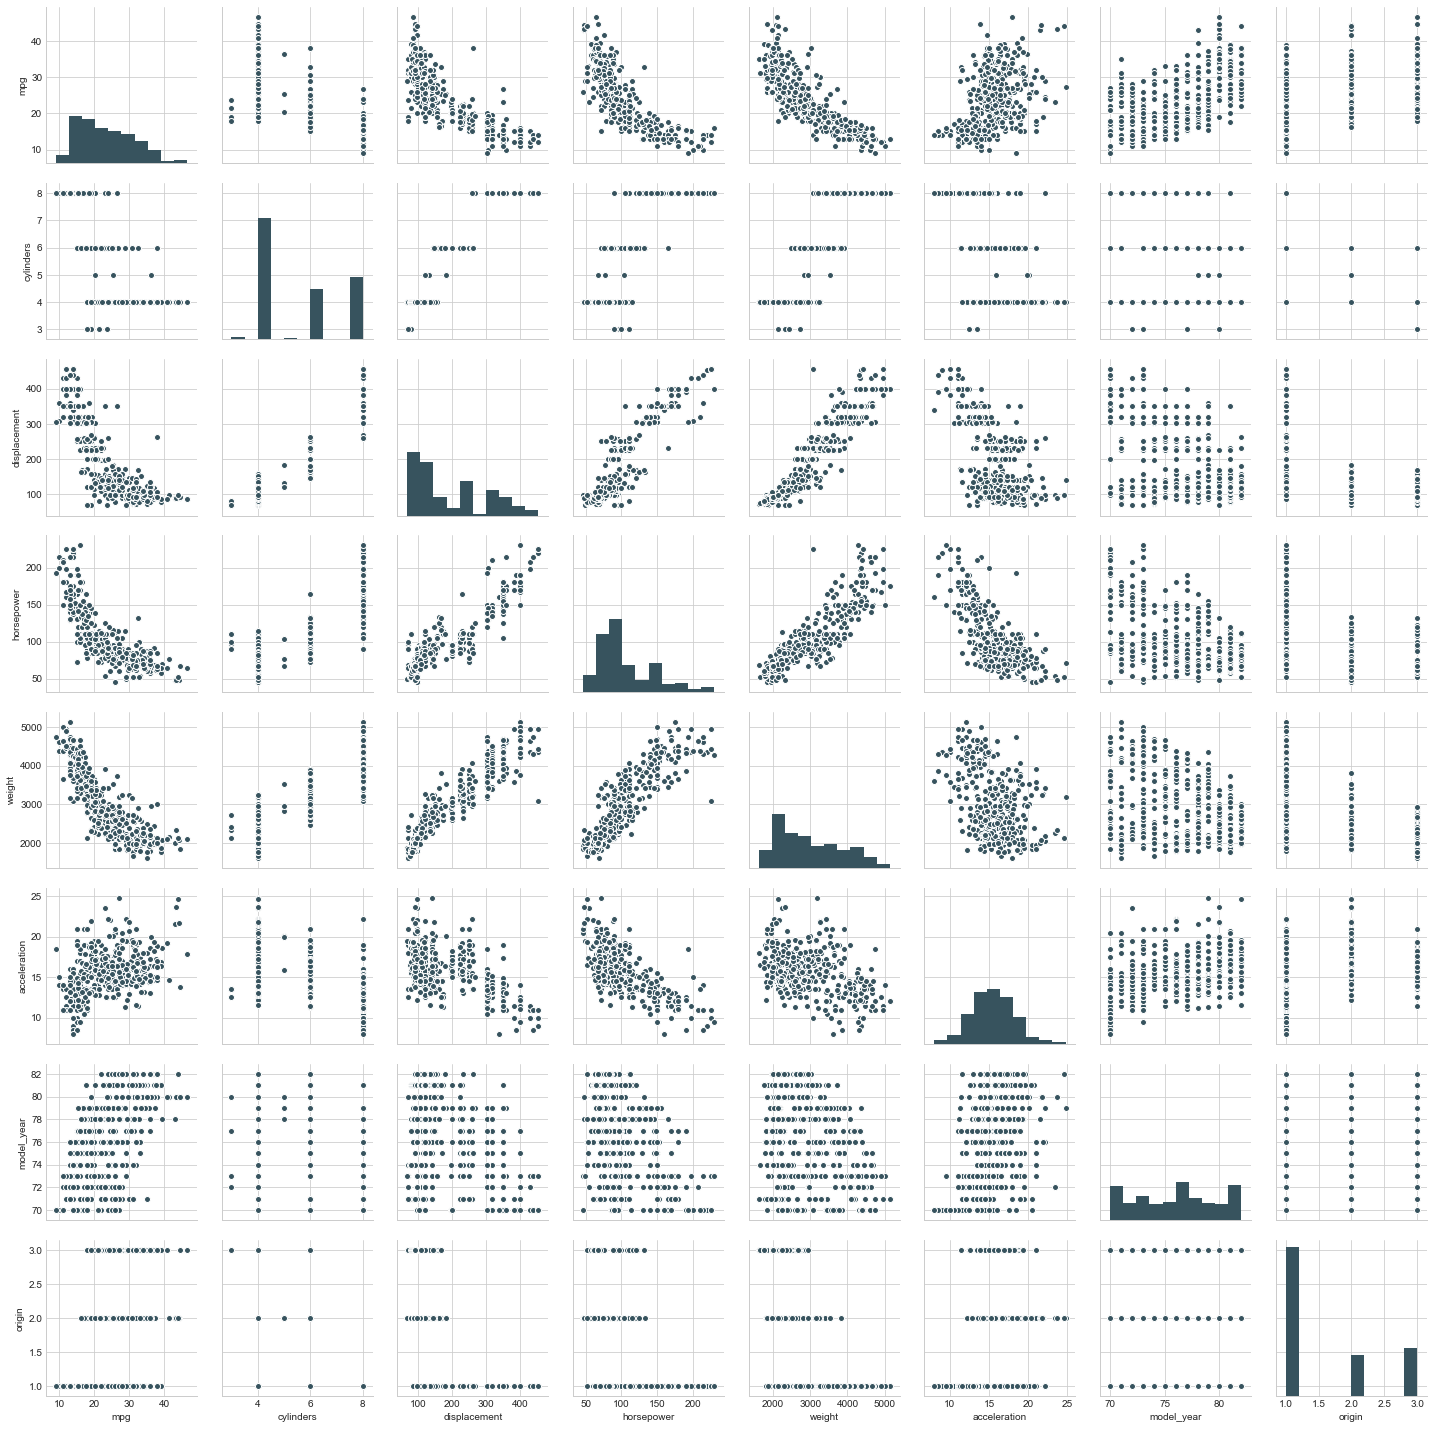

In [53]:
sns.pairplot(mpg_data)

MODEL - 1

In [54]:
##Training Data
mpg_reg= pd.get_dummies(mpg_data,  columns=['origin'],drop_first=True)
## we keep two of three dummy variables created for the origin as it is a categorical type data

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [56]:
y = mpg_reg['mpg']
x = mpg_reg[['cylinders','displacement','horsepower','weight','acceleration','model_year','origin_2','origin_3']]


In [57]:
x_train ,x_test, y_train,y_test = train_test_split(x,y,test_size =0.3, random_state =101)

In [58]:
lm = LinearRegression()

In [59]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [60]:
predictions = lm.predict( x_test)

Text(0,0.5,'Predicted Y')

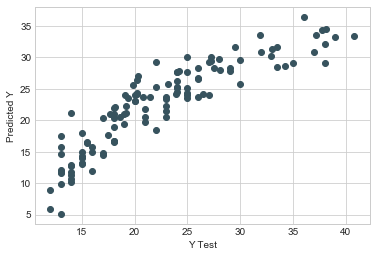

In [61]:
## lets plot actual and predicted values
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [62]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 2.65425420762
MSE: 10.7466126159
RMSE: 3.27820265021


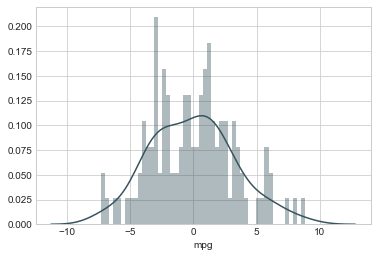

In [63]:
sns.distplot((y_test-predictions),bins=50);

In [64]:
lm.score(x_train, y_train)

0.82929453503524642

(array([  7.,  28.,  28.,  36.,  22.,  24.,  24.,  30.,  23.,  21.,  17.,
          5.,   3.,   3.,   3.]),
 array([  9.        ,  11.50666667,  14.01333333,  16.52      ,
         19.02666667,  21.53333333,  24.04      ,  26.54666667,
         29.05333333,  31.56      ,  34.06666667,  36.57333333,
         39.08      ,  41.58666667,  44.09333333,  46.6       ]),
 <a list of 15 Patch objects>)

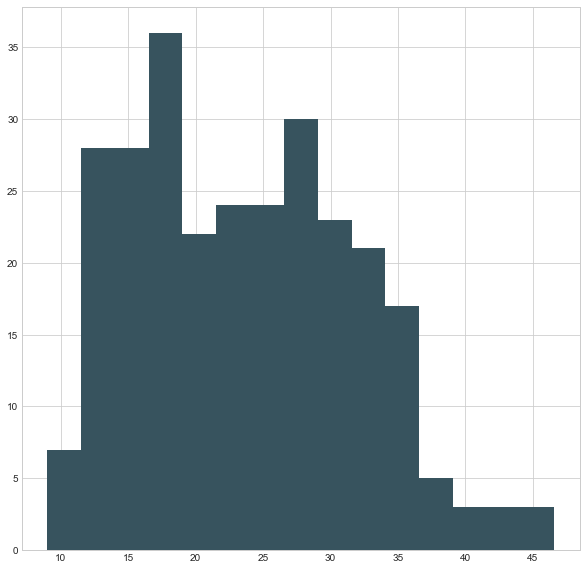

In [65]:
plt.rcParams['figure.figsize']=(10,10)
plt.hist(y_train,bins=15)

Our target column is not properly nomally distributed, there is slight skewness. One way to handle this is log transformation

MODEL - 2

In [66]:
y = np.log1p(mpg_reg['mpg'])

In [67]:
x = mpg_reg[['cylinders','displacement','horsepower','weight','acceleration','model_year','origin_2','origin_3' ]]

In [68]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.333, random_state=0)

In [69]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [70]:
predictions = lm.predict( x_test)

Text(0,0.5,'Predicted Y')

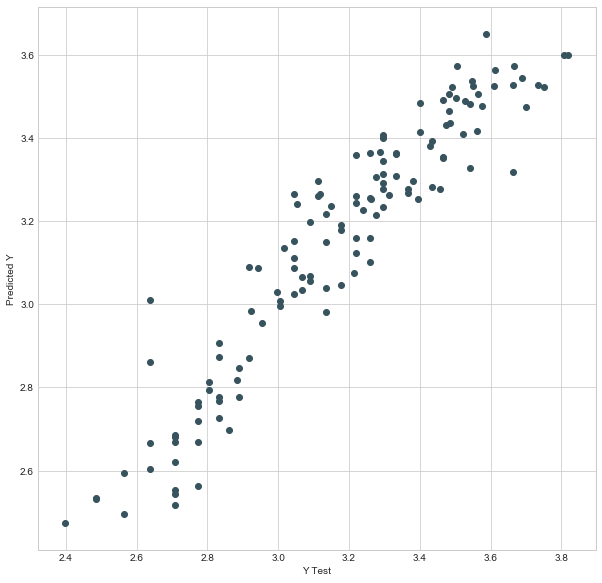

In [71]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [72]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.0846675905792
MSE: 0.012079588238
RMSE: 0.109907180102


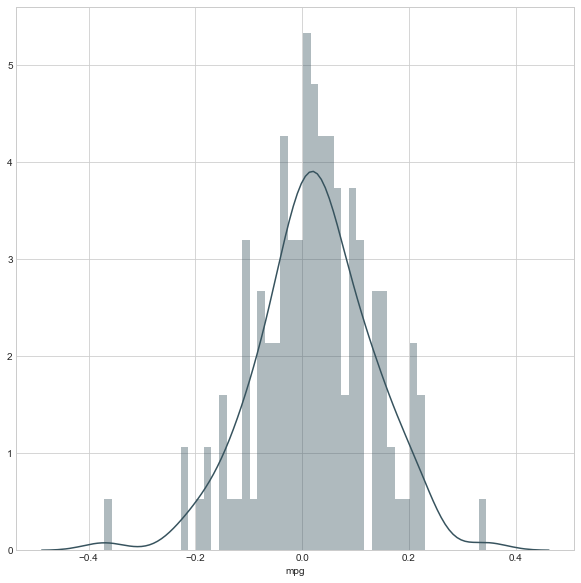

In [73]:
sns.distplot((y_test-predictions),bins=50);

In [74]:
lm.score(x_train, y_train)

0.87494904356989833

(array([  2.,   2.,   4.,  28.,  15.,  20.,  37.,  20.,  28.,  27.,  27.,
         22.,  21.,   4.,   4.]),
 array([ 2.30258509,  2.4066016 ,  2.51061812,  2.61463463,  2.71865114,
         2.82266765,  2.92668416,  3.03070067,  3.13471718,  3.23873369,
         3.34275021,  3.44676672,  3.55078323,  3.65479974,  3.75881625,
         3.86283276]),
 <a list of 15 Patch objects>)

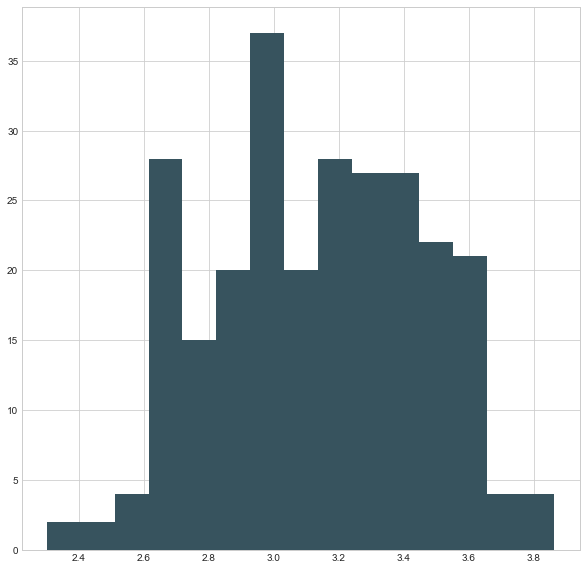

In [75]:
plt.rcParams['figure.figsize']=(10,10)
plt.hist(y_train,bins=15)

### Now our model looks better with improved r^2 value , now lets check if we can drop any variables from our model

Model 3 

In [76]:
## Lets see T value for our previous model
import statsmodels.api as sm

import statsmodels.formula.api as smf



X_train_1 = sm.add_constant(x_train)
model = sm.OLS(y_train, X_train_1)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     220.4
Date:                Fri, 09 Mar 2018   Prob (F-statistic):          4.02e-109
Time:                        17:13:42   Log-Likelihood:                 196.25
No. Observations:                 261   AIC:                            -374.5
Df Residuals:                     252   BIC:                            -342.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.9030      0.199      9.565   

#### As we can see that t value for displacement, acceleration , cylinders are not significant at  5% significance level


In [77]:
## Lets Drop them from model and see our r^2 is affected much or not

In [78]:
y = np.log1p(mpg_reg['mpg'])
x = mpg_reg[['horsepower','weight','model_year','origin_2','origin_3' ]]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.333, random_state=0)
lm.fit(x_train,y_train)
predictions = lm.predict( x_test)
lm.score(x_train, y_train)

0.87323089087034034

In [79]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.085655631509
MSE: 0.0125820991561
RMSE: 0.112169956567


Very small standard errors suggesting the model to be good

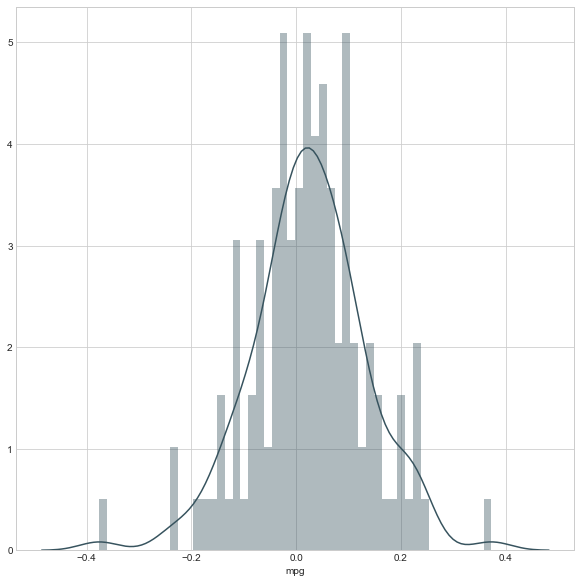

In [80]:
sns.distplot((y_test-predictions),bins=50);

### Residual Plot is normally distributed suggesting the model is good

In [81]:
#### Plot between actual and predicted variables 

Text(0,0.5,'Predicted Y')

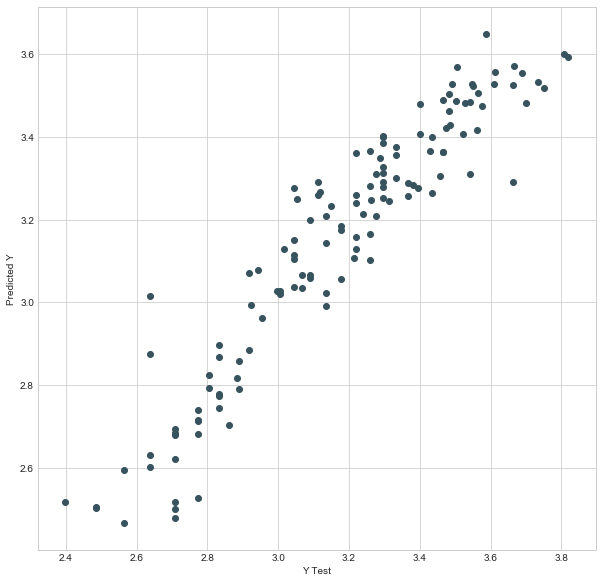

In [82]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

lets explore the t values of variables of our current model

In [83]:
import statsmodels.api as sm

import statsmodels.formula.api as smf



X_train_1 = sm.add_constant(x_train)
model = sm.OLS(y_train, X_train_1)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     351.3
Date:                Fri, 09 Mar 2018   Prob (F-statistic):          3.87e-112
Time:                        17:13:43   Log-Likelihood:                 194.47
No. Observations:                 261   AIC:                            -376.9
Df Residuals:                     255   BIC:                            -355.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8170      0.178     10.228      0.0

### All variables are now significant at 5 % significance level

Interpreting the coefficients:

Holding all other features fixed, a 1 unit increase in horsepower is associated with a decrease of 0.10% in mpg.

Holding all other features fixed, a 1 unit increase in weight is associated with a decrease of 0.02% in mpg.

Holding all other features fixed, a 1 unit increase in model_year is associated with a increase of 2.77% in mpg.

Holding all other features fixed, if car is made in Europe (origin_2) then mpg will increase by 6.66% 

Holding all other features fixed, if car is made in Japan (origin_3) then mpg will increase by 6.33% 

### Hence this model is better than all we created 

## Equation :

log(mpg) ~ 1.8170  - (0.0010 x horsepower) - (0.0002 x weight) + (0.0277 x model_year) + (0.0666 x origin_2) + (0.0633 x origin_3) 

GITHUB LINK - https://github.com/saurabhdiwan34/MyProjects